#### Mounting Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow import keras

print(tf.version.VERSION)

2.2.0


In [ ]:
import keras
keras.__version__

Using TensorFlow backend.


'2.3.0'

In [ ]:
import time

#starting time -> da izmjerimo koliko programu treba da se sav kod izvrši
begin = time.time()

#### Data Preprocessing

In [ ]:
fldr="/content/drive/MyDrive/Colab Notebooks/Face_data_based_deeplearning/UTKFace"

In [ ]:
import os
files=os.listdir(fldr)


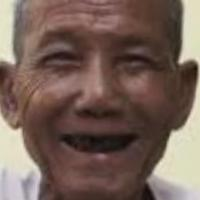

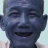

finished


In [ ]:
#prolazimo kroz svaku sliku i iz naziva uzimamo podatke o godinama i spolu(prvo broj u nazivu označava godine, a drugi spol)
#0- muško, 1-žensko
import cv2
ages=[]
genders=[]
images=[]

for fle in files:
  #iz slike uzimamo podatke i spremamo u polje
  age=int(fle.split('_')[0])
  gender=int(fle.split('_')[1])
  ages.append(age)
  genders.append(gender)

  #učitavanje slike iz putanje kao polje piksela, promjena formata boje i rezising te spremanje u polje
  total=fldr+'/'+fle
  #print(total)
  image=cv2.imread(total)

  #iz dokumentacije: When the image file is read with the OpenCV function imread(), the order of colors is BGR
    #Therefore, if you want to use both the Pillow function and the OpenCV function, you need to convert BGR and RGB.
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image= cv2.resize(image,(48,48))
  images.append(image)

print("finished")



In [ ]:
''' visak 
for fle in files:
  age=int(fle.split('_')[0])
  gender=int(fle.split('_')[1])
  ages.append(age)
  genders.append(gender)
'''

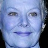

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(images[24])

In [ ]:
print(ages[24])
print(genders[24])

80
1


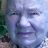

In [ ]:
cv2_imshow(images[53])

In [ ]:
print(ages[53])
print(genders[53])

80
1


In [ ]:
import numpy as np
images_f=np.array(images)
genders_f=np.array(genders)
ages_f=np.array(ages)

In [ ]:
np.save(fldr+'image.npy',images_f)
np.save(fldr+'gender.npy',genders_f)
np.save(fldr+'age.npy',ages_f)

In [ ]:
#loadanje ako smo već jednom obradili
import numpy as np
genders_f = np.load('/content/drive/MyDrive/Colab Notebooks/Face_data_based_deeplearning/UTKFacegender2.npy')
images_f = np.load('/content/drive/MyDrive/Colab Notebooks/Face_data_based_deeplearning/UTKFaceimage2.npy')
ages_f = np.load('/content/drive/MyDrive/Colab Notebooks/Face_data_based_deeplearning/UTKFaceage2.npy')

Male = 0
Female= 1

In [ ]:

values, counts = np.unique(genders_f, return_counts=True)
print(counts)

[27153 18961]


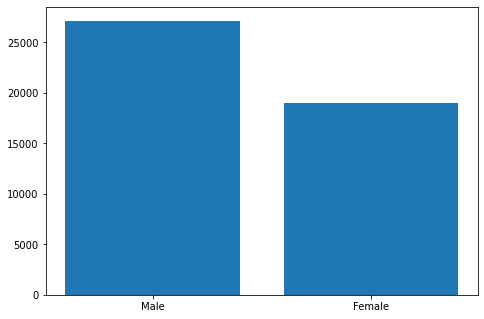

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
gender = ['Male', 'Female']
values=[counts[0],counts[1]]
ax.bar(gender,values)
plt.show()

In [ ]:
#vidimo da ima npr 1123 osoba s 1 godinom i 4 osobe za 116 godina
values, counts = np.unique(ages_f, return_counts=True)
print(counts)

[1123  720  459  452  367  351  324  454  363  289  229  312  289  312
  334  405  334  478  306  518  558  698  755 1224 1129 2672 1261 1454
 1281 1208  881 1314  780  997 1564 1187  951  815  738 1020  674  776
  627  462  862  525  526  433  482  621  366  448  473  599  522  546
  337  411  296  513  359  249  279  170  365  215  248  216  204  241
  127  158  163  132  220  158  128  191  109  237   22   40   18   24
  155   35   10   34   33   82    2   13    5    9   17    9   11    2
    1    5    5    1    3    4]


In [ ]:
#val=values.tolist()
cnt=counts.tolist()

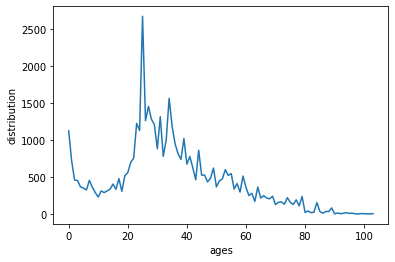

In [ ]:
#u bazi podataka najviše dvadesetogodišnjaka
plt.plot(counts)
plt.xlabel('ages')
plt.ylabel('distribution')
plt.show()

In [ ]:
#pripremanje kategorija za varijablu Y
labels=[]

i=0
while i<len(ages_f):
  label=[]
  label.append([ages_f[i]])
  label.append([genders_f[i]])
  labels.append(label)
  i+=1

In [ ]:
#normalizacija podataka
images_f_2=images_f/255

In [ ]:
labels_f=np.array(labels)

In [ ]:
images_f_2.shape

(46114, 48, 48, 3)

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test= train_test_split(images_f_2, labels_f,test_size=0.2)

In [ ]:
#prvi element označava godine, drugi spol
Y_train[0:5]

array([[[ 9],
        [ 0]],

       [[44],
        [ 1]],

       [[ 9],
        [ 0]],

       [[ 6],
        [ 0]],

       [[21],
        [ 0]]])

In [ ]:
#pretvaranje iz oblika [[[godina], [spol]],...] u oblik [[godina],[godina],...][[spol], [spol],...]] dakle iz toga da u svaki array sadrži godinu i spol u oblik da jedan array sadrži godinu a drugi spol
Y_train_2=[Y_train[:,1],Y_train[:,0]]
Y_test_2=[Y_test[:,1],Y_test[:,0]]

In [ ]:
Y_train_2

[array([[0],
        [1],
        [0],
        ...,
        [1],
        [1],
        [0]]), array([[ 9],
        [44],
        [ 9],
        ...,
        [35],
        [36],
        [64]])]

In [ ]:
Y_train_2[1][0:5]

array([[ 9],
       [44],
       [ 9],
       [ 6],
       [21]])

### Model

In [ ]:
import time
#start timer after images are uploaded and ready
start = time.time()

In [ ]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten,BatchNormalization
from tensorflow.keras.layers import Dense, MaxPooling2D,Conv2D
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

def Convolution(input_tensor,filters):
    
    x = Conv2D(filters=filters,kernel_size=(3,3),padding = 'same',strides=(1, 1),kernel_regularizer=l2(0.001))(input_tensor)
    x = Dropout(0.1)(x)
    x= Activation('relu')(x)

    return x
def model(input_shape):
  inputs = Input((input_shape))
  
  conv_1= Convolution(inputs,32)
  conv_2 = Convolution(conv_1,32)
  maxp_1 = MaxPooling2D(pool_size = (2,2)) (conv_2)
  drop_1=Dropout(0.25)(maxp_1)
  conv_3= Convolution(drop_1,64)
  conv_4 = Convolution(conv_3,64)
  maxp_2 = MaxPooling2D(pool_size = (2, 2)) (conv_4)
  drop_2=Dropout(0.25)(maxp_2)
  flatten= Flatten() (drop_2)
  dense_1= Dense(64,activation='relu')(flatten)
  drop_2=Dropout(0.2)(dense_1)
  output_1= Dense(1,activation="sigmoid",name='gender_out')(drop_2)
  output_2= Dense(1,activation="relu",name='age_out')(drop_2)
  
  model = Model(inputs=[inputs], outputs=[output_1,output_2])
  model.compile(loss=["binary_crossentropy","mae"], optimizer="Adam",
	metrics=["accuracy"])
  
  return model


In [ ]:
Model=model((48,48,3))

In [ ]:
Model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 48, 48, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 48, 48, 32)   896         input_1[0][0]                    
__________________________________________________________________________________________________
dropout (Dropout)               (None, 48, 48, 32)   0           conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 48, 48, 32)   0           dropout[0][0]                    
______________________________________________________________________________________________

#### Training

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf

In [ ]:
fle_s='/content/drive/MyDrive/Colab Notebooks/Face_data_based_deeplearning/age_and_gender_3_before_v2.h5'
checkpointer = ModelCheckpoint(fle_s, monitor='val_loss',verbose=1,save_best_only=True,save_weights_only=False, mode='auto',save_freq='epoch')
Early_stop=tf.keras.callbacks.EarlyStopping(patience=75, monitor='val_loss',restore_best_weights=True),
callback_list=[checkpointer,Early_stop]

In [ ]:
History=Model.fit(X_train,Y_train_2,batch_size=64,validation_data=(X_test,Y_test_2),epochs=30,callbacks=[callback_list])

Epoch 1/30
577/577 [==============================] - 45s 20ms/step - loss: 17.3651 - gender_out_loss: 0.9439 - age_out_loss: 16.3000 - gender_out_accuracy: 0.5566 - age_out_accuracy: 0.0248 - val_loss: 17.9243 - val_gender_out_loss: 0.6206 - val_age_out_loss: 17.1941 - val_gender_out_accuracy: 0.6613 - val_age_out_accuracy: 0.0244

Epoch 00001: val_loss improved from inf to 17.92427, saving model to /content/drive/MyDrive/Colab Notebooks/Face_data_based_deeplearning/age_and_gender_3_before_v2.h5
Epoch 2/30
577/577 [==============================] - 10s 18ms/step - loss: 14.4292 - gender_out_loss: 0.6042 - age_out_loss: 13.7132 - gender_out_accuracy: 0.6749 - age_out_accuracy: 0.0245 - val_loss: 13.9831 - val_gender_out_loss: 0.5243 - val_age_out_loss: 13.3332 - val_gender_out_accuracy: 0.7467 - val_age_out_accuracy: 0.0236

Epoch 00002: val_loss improved from 17.92427 to 13.98314, saving model to /content/drive/MyDrive/Colab Notebooks/Face_data_based_deeplearning/age_and_gender_3_befo

In [ ]:
fldr="/content/drive/MyDrive/Colab Notebooks/Face_data_based_deeplearning/age_and_gender_3_after_v2.h5"
Model.save(fldr)

In [ ]:
#print(saveModel)
tf.saved_model.save(Model, "/content/drive/MyDrive/Colab Notebooks/Face_data_based_deeplearning/")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/Face_data_based_deeplearning/assets


In [ ]:
end = time.time()
try:
  print(f"Runtime of the full program is {end - begin}")
except: pass

print(f"Runtime of the model training is {end - start}")

Runtime of the model training is 365.4316408634186


### Evaluation

In [ ]:
from keras.models import load_model
loaded_model=None
try:
  loaded_model = tf.keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/Face_data_based_deeplearning/age_and_gender_3_after.h5")
  loaded_model.summary()
  #loaded_model.evaluate(X_test,Y_test_2)

except: pass



Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 48, 48, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 48, 48, 32)   416         input_1[0][0]                    
__________________________________________________________________________________________________
dropout (Dropout)               (None, 48, 48, 32)   0           conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 48, 48, 32)   0           dropout[0][0]                    
______________________________________________________________________________________________

In [ ]:
Model.evaluate(X_test,Y_test_2)

289/289 [==============================] - 1s 4ms/step - loss: 9.0367 - gender_out_loss: 0.3721 - age_out_loss: 8.2261 - gender_out_accuracy: 0.8453 - age_out_accuracy: 0.0244


[9.036651611328125,
 0.3720717430114746,
 8.22607707977295,
 0.8452780842781067,
 0.02439553290605545]

In [ ]:
pred=Model.predict(X_test)

In [ ]:
pred[1]

array([[24.167452 ],
       [28.336662 ],
       [ 6.3289967],
       ...,
       [15.532295 ],
       [ 2.9776833],
       [12.35057  ]], dtype=float32)

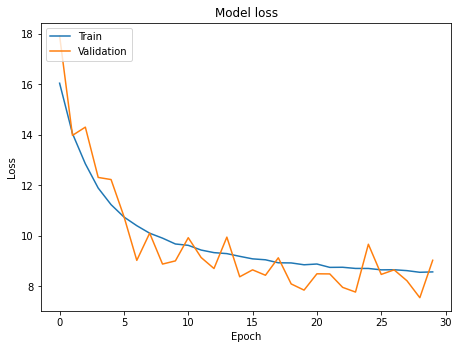

In [ ]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplots_adjust(top=1.00, bottom=0.0, left=0.0, right=0.95, hspace=0.25,
                        wspace=0.35)

### For Gender

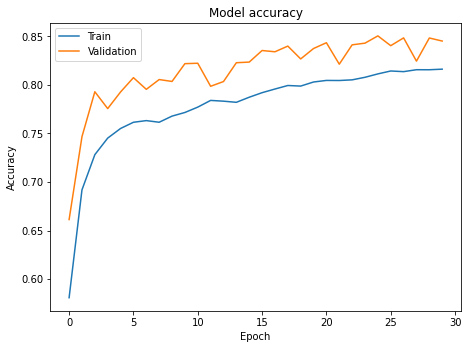

In [ ]:
plt.plot(History.history['gender_out_accuracy'])
plt.plot(History.history['val_gender_out_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplots_adjust(top=1.00, bottom=0.0, left=0.0, right=0.95, hspace=0.25,
                        wspace=0.35)

### For age

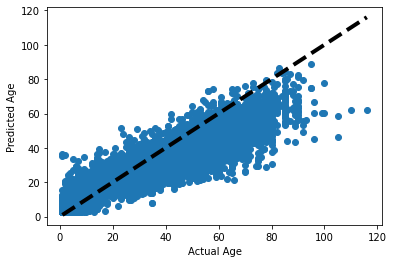

In [ ]:
fig, ax = plt.subplots()
ax.scatter(Y_test_2[1], pred[1])
ax.plot([Y_test_2[1].min(),Y_test_2[1].max()], [Y_test_2[1].min(), Y_test_2[1].max()], 'k--', lw=4)
ax.set_xlabel('Actual Age')
ax.set_ylabel('Predicted Age')
plt.show()

#### For Gender

In [ ]:
i=0
Pred_l=[]
while(i<len(pred[0])):

  Pred_l.append(int(np.round(pred[0][i])))
  i+=1


In [ ]:
from sklearn.metrics import confusion_matrix 

from sklearn.metrics import classification_report 

In [ ]:

report=classification_report(Y_test_2[0], Pred_l)

In [ ]:
print(report)

              precision    recall  f1-score   support

           0       0.82      0.94      0.88      5400
           1       0.89      0.71      0.79      3823

    accuracy                           0.85      9223
   macro avg       0.86      0.83      0.83      9223
weighted avg       0.85      0.85      0.84      9223



In [ ]:

results = confusion_matrix(Y_test_2[0], Pred_l)

In [ ]:
#test
import cv2
import numpy as np
uploaded_image = cv2.imread('/content/drive/MyDrive/male_face.jpg', cv2.IMREAD_UNCHANGED)


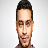

In [ ]:
from skimage.transform import resize  
from google.colab.patches import cv2_imshow
img_resized = cv2.resize(uploaded_image,(48,48))
cv2_imshow(img_resized)

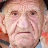

In [ ]:
#online
from urllib import request
from google.colab.patches import cv2_imshow
url = 'data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAADAAAAAwCAIAAADYYG7QAAAVcklEQVR4nCXOV8+m6WEQ4LvfT3+ft359vjKz0zyeWa93YyO5rOTESEE5CFJEjBRAIgcoIFnigDPO+AOABGcghBAWXYIUbMIax+w6Llu8bXb6fPO1tz693J0Drl9wwf/1e999Nbj2Xx+9fOu33n717PE49t/78x+atsZC3z45gn2zPZ4kcTKdTseTse1lGIZhHDNKm6bs5ivjbHQwIdFI5jlDQALt80EvxGQ6KYsSQVy0perabLm2zray9QfhxdU8K6uy7aM0bSX42aePn5xdUQv8dGCtJf998kAYW0nx6N0f/+idv9ifDgOgI0a2dneIk4fH10ZRnEYJhIg6CwcBiwNAkDAyjn2i4jAewDgwwiSjyWR76/NnX1RtIZt29eqUEiowCNIoGgQ+p8q41Wa5Wi0QcAzB6Wi4KStE/ZPjg0XdtWXddR1jjPzsxz9oO9O1+llviJGzNLZVsTdOBwEfD5PrR/thEo1mE9/3Pc+jAAHrdC/6uonjwGmpAOSOkEm0ulqUD+uBImh3V1QNHFmGSdt0nZPtpm7bbl0XcRTePLnx8NHDgFENLUcOYptE/tbW9PNNziGklJK+4+XyCiNQ1s2928cYQy/me/s722EynY0wdroopLSA0lJrYbXR2gM45v6nz588ePNrDvN8U6Mnl4dHe3w2XeeFyhsvGUspaZJMkkgDpWTfLFfs4sKK/vz01d721otXZ5Szthca6CRJp7Pp1XzdlKXWGr42HEkprbVRFN053uOg2Ymi12/epr67f/9e01aM8uF45oCx1sLeAMt4ELeyVZkUbWEInFy/CbVWuqmLmuMwPz89unmrNLbuOiUqC51Qqq6qJI4RcHWV96rN8ny5XBVFEUSR4MNXjTq9Wn724cdKKYIQQghBCEejURrxsc+v720f3zoeDMK8ysfjobVgtcnCKEIAj7dn1tAsK/3BYLY3Xs4vA5+fnZ8lHh8OB9OjXeE843pvMrbKpNxvqp4HOK9XUZlX680mW0W+F4fpi5fnlDLfDwLfK5vGaDhIov8/QU3TCCG2trY4Z4mP7hzu7k7T3tTM4+lwtNqsjXPbu7tb2weT6V4jHeb+dHsfWtY2wiIej6az2Xjv+EbfyotXZ8aqcDS2EDmAnIGU4tVq1bUCs5BHo53D1xTii1XhsYhg5nkMOkeQm45GwJrbt28rpQhjhHJvPJkMB/Fr1yfDAHscB4HX9p0xav/gEGGqjSOESwsZAVIY4qDPfCBV7Cd9J4t8E28dUS/EXeYzvFx0UWScNFK2db8cJIOmJ4jQMBlrLWthDqJRWXxICCMUQGcjQogXHB4dnMEFJRQJ2Uy2t4bTwd7++Ohwd+/4WjgYxEFirD44vt5atK47QLi0oNMaUk4RpsAK0QlPeyHhGA+jYRj5nesNx5DgKBlKo1nAPD/2aKiVm44ns+nEWKmQ27t+Pe8kj4YQM8b8IE4Y5Zx5g9ns5r3XndNoOpmFgff6V748GsfM4waC8XTa9n0cp51UkFFHyKZYn128dLrB3CFuhGuKchEOQ8fco+df0IhZXRmo90721vl5MvFa1W3KjXR1L/X55enp6ReXl8/m2WLd1I3F6cHx6NphJZRzuBdaAziazkTRdn0bRwFJkgHCECJ75+51DuR4EHqMravWSwdRGKusnKbR5emLNIqffvKBF/hO2SAK0+3p5dnLcTI+OTr45KNf/sZk1CrTOyBt/+LRJ4zGEMJnF88tQp9/8unO1lYcJdFksinzHsJfv/+rSTqIwkBpCYBjQcSDkBrcbebf/4O/QYbjcSfb2Xg4SBKqOwyx7npCCcQYc8YBPPv8i1/+xU9l3Q6Gw/mri+lkFG2nD77ztnPm6fMn42R078G9qhUei5qqf/TsDIqa80ZW9V++884sHodJWtXzh+fvL6rN7/6d74Wuf+veDdEJWebAhlW5doCsNvne9tatg63YKfgv/sk/KqvyjbfebJpmN4W73CvWK0f9dDpbLpcwb//Hv/33Xz2+Ndm/9irPPJ54wGCibRIe3D1GCIdhjDE2wG+y8uLqQmNo2gpg2FyuYNU/ma8fXZzNdnd3huMhAi9fPn/ru98cbG2tFkto4YfvfxQlQRuOXTwZhywNAx9C+P5//OetAShKW2WnXCScWAO9aEAphL365Q//T4TI6vzqk9XyUuuzZXXv8OQbN1+beBTFAGA3msyGo/1G2Gy9qor11fkFBObk1i2q0Cc//+Aj1b338UetEF9/8OCux7axP717hCZRW7Xzi3lV1IThuWV0sktVtz+eOqNQ1MqR1OjiMq0qnTUYsnS0bQw+e/5yfnaJKD64cVII8Tf//h9VkGy6VnPuj6dNW03SFCNjoQHIq5uexWHVtV1dTKejVognz18e37iVODJEfMqi37h59+b11+L9WVEWs8nEOh3HIcKAAxAiNAujkRfgWhztH8D3/+k/3ts7yIq67WQPuv0HD0ZB4jDgBH7w3k93x9tO6FGcLPL60fOXPEi3d3Z9wlbz+WhMT1fn9974qu54r4GQzfri5dnnD3spvvTm15YvFqFh4SDG2EloIUAImEIXs93Ro2efb+/td8KcPTvHGLWNSA6v7SbjqmwPjg7IbLJ3+vTF1mwMXNeWDePeqsgctm22PDjcrde17SEygilyNN0PguTqfNHHYTwdLzfnxzduj3evZYtalYoynabjfjZt6/5qvrj22nGzqjdFO/QoghpiaDDZOzh0UM7Gs+FgePXo2Xg0qoo1Fu0s8ahud28cRoMBicO0iLO23DQXZ1UHKSHeeEQZzKw0Sh6cvNblJj/fIIsZDaywo3QcbqWX66uT124PdyfaQC9MEVTacFmXmPJoEFZGNarbv33UbISoO1kvKUWYB8bBpmrWy0IalCRpudqYrmMImL4TAkTQ9k1JGtPEs8H84WWf1fvX7wCCNvNlwCnQmJDEggh5JpwiZKAlBEFsnFoXi9F05MepdFgrCyGFhFonHcIOEkMJsza/vOrWm+PjW8PpSb4MnO4kcEL1RtvhYBwNhk9fPR+nqWw7IRupgTNALda9MQh5VBRtGo7Pijq8ceC0SydTAJCfTpTi5aYpswJiC2yp6mV29lmlCubHcTrBvt/nLe4UxAYTDCSAEMEQC9lPrm0NZxNo0fNPf33+wf+mNncMMOqc1AjwiA2K5YYjUmcrYHvNXRiF0cGW8AkCECELnAXPV1d//e/9obTGKAMhFFJ2Tau1QQTLvpfranMxL9cbL0o1dNdfO4gjBBGAhEoNnIKOYkz5IBz52MdOletlEHujvXEwm87zfH4x13Vflz0EDAAOg9CxkAeJwQwS0vZCKTWeTJ2Squ8IJ76VZl3WNg29rnFSdVr7cYgs1p1EhFjOpAf8wQ6PBn3Vn1zfqxeL04uzo/tfSSZTLZGRzlrLmAd4NBzuGCvyVbtSy6Mb+1uHJx4LLp69dLgMh2NIMfK8Rb1ywIVBuJxfQAu5F2RFdYhpNV+0eYnqpoHSIWmKrIQQ5uvM9zyIMXEw9P2ybdIk7apWCaONvXbzptTm/b/8aHt4wxjgCAGEyUb3q0L3xiFGkjFNxqpFtgI/e+dd34tpNDq4ddtil2VXVbtZ1ct0HEcRPXv6RRpxB2AQRdu7e58/fPTs488oZygYDUc7WwyTwDnrAApwr1sjeudhBYXPkBAV9HC8tzfb3pcI4bw5PPmS5gSHvjNOVLUzBlkKBEQaEQNBb7zQkpBMt24sHz/Z29vmPosGkXDGCNE3hawrhhznkFHWN91oe8tPoo/f+8X+3S/BMEQdtfG12Y0v3flv/+6/NFntI8qR7/G0zErOoAKlJvLmV77sD2LMKOzEi8cPjx7chqmHPeSQoQwL1eV1bpHFjEAKvdDHFEktKac/+uM/EZtNOhoH6Ygh0jUNgYj7ESZ8Opmsl0tKme561fe+jw0wgzRBpOvPlvOTB1++fuvu6eMvZLHiBDnEiANCyrKpJ7vb0lmCsKya8uzsnR/9mZJNnPqQWEgcIDZKfT8Jqr4GFGBOEIGIIuV0K5vxdNgs56NoQL3I9zxGmBR9GKd+MDQSEAgJZQHlWMtvfvuvTHamF/ML1H7xfGc4rq25fv/eW1+5uzh7pLpKG9W1NSPBcHBASMQpRdqCRuRX8zcf3P/olz+vFouqzpTtAXYA23AQs5AhTjotMMMWGKVlOhluHex+8v6vsotl5CUeZdA5Z6xzWCgNEATWAACSOM5XS6k6QOB4MiZouXbna70zghQKpRMcaWRBU44mexLYaBprqClwRsqqWp09+2J2vBvOkjKfmw0gWzsQYmvA/MWcMCxqDJHL8mXeFVuzbaiVHwSvqvXVk09GX77H48i3TXlRV3nGmSYECa2DYays7I2I4BgAI0RP+tPHp1aP9r4TplMXovZiSXslmWet7WXPQj8MmaxquSnE5XKxWe3fv20pmU0mxrWnp48Z842xFxcLL/SH41EvxGJR7exdo4zITnESzQ6PyroYmTYIvLZmGAPTtwBiJaTHg3C2q4SFkvqjQb6ooIVI1bnpakaxNEIACjAsz64cZ57nJUmCEALW6LZp87zKNoPpzB8PsR9YhIWQk8mEUtI0dZwGELuqqYM4vHnrlnLOEeZ4oBj1R9Pzs9PL0ycAGs/zGSfFZg6kkEJI5fh6zSnlo6kRjjguVmv0yZMni9V8PX8FibGOGGMvnz+XQgspAQAYQtW29SYry+Kzl4/3bp4IB+te9lJ1rYKQMBr4XsRCmgyTIA4tgFmxlMrUrYYkkMD2EFZdC4yUfQ8hAtBmi7kUXVs3Uung/DRklkwGMu+BlFuBh1bGtK+enP3Jn6Gy7a2MJjuPnn6OGoE5RRhwZ7v5Uq4y0EiN8PTaDqGkXRbLL54K46QDi2yFOPEMJZ3pL+bqcl6cr5ursl9WoOy4IeFkfP/ttz0aq1ZAYjxGPAtaIxEhndbj1pZPLz0YLKqKrl5R0ZM7N448Y3ndPP1P//nge79fMbpTuU42UDAKQduJarlsm3ZTtnsnJ1W5aWsVabR8+FL9pM7yrChK7WwOVZkXHmH5JpOMSGO5F9x/443bb74eD6PAA5vL89APjFaIYKkV4l4rVKDV/vDYdnrz6UdJs8GLUxxGJEwHnTY4jvJqefZv/jVTkJ5fLP74h9d+93dYFJR1pfvu7PzV/a9+o3M2osjC5ifvvRdAcnDv1s3p2IsjHngEIQRBkeXOWFksF5sME6qNW60XSnb+7ujVYvlg95p2yCLocU9ikjfdDoR5dxUZ6WdytZ6HOyPnh2Qp5KZtPQIb07OiWj0867Ir+/zpH/zmt+dtJbP88vTlva+8gQJvJ0nmL16u1tlvf+/3rLUEwDCMICad0Z2oMMbRbMgpbXLQew5jaowly1yLTmiXbu1iTCF0vh8g37cOeIk/XGmqIKJejYHyI+sQIoSISgwApY0NiC/aLAnoLDyGDvXLBb953TXi9pff3Ll7f3G1avpuXpW3X78POaQYWwhFlQkhLUaqa6SzddNwzl2vZdUhJIB1Aca1U46gdDIlnGfrXClNx2kxv+plN9va1kUrgTAQDgwEVscUIUiYw8QQWhkFEPeTsSFeo92v333XGrN1eGTDwCEaxunLy8XJvTvM56BXpu5kXvdZBvpKNXNolOpbBh0BlhgXEJYG0TBKIIROm/nLs0EQO4T9MIaI9E70eSFbMfrW19zX7mUH434W4WnipSOMKemcAwBQgnrKJKXAZyyJ/bZXuvc4BwD7QSjaUlQdQiYIA9crqIwlQOnOD/0iK9ZFla1fEUoggEqp7XQc+4ExhhDMKaWdaMsmIFwC6CAq62a1mIuuuff2N5soOt/k/v6BOn+1jZjrdJVXxFMIBNRQZIH1SGB15wcEELKqK1G0YOANvQg5gBnCmEBjsYO9chbaXtmqMxAno9koDjqHjLZWSXvx5On2zqRtquFw6IeDsm6Hafjq9Mn48KCoslW2hACg7euzazcePfwkU82N6TU6O+ieP23rnBiLfrDJftrqHMeJv2MotQF1Ht6IinLfdL2BtiiKvuukaP3Ac0BoIyAiWgKKgu2tozicYkAQCcM4idLYIHt8927vgD+IeejneV4URS/6l8+etKvVen4JESAA/7N/+a9enV62zXJvPB5GaTiddgQTjBFEZBlsr1v1/q+fTEfpg93hKEzn6zn1fNzppsmbDCc4FKLtm9ZyssrmW+mOswxCjyJqFDBaG60Y411XeLHnB1xqkM4mXblRRkFoEMFl3x8e33jxxWOJTBCHy8XL+WJzmTV76Yg4rKTGmALfww3XfUsIsEI7GIw3lv75k41nxIiZw0l64IHzsxeHs0lWbjwAisVq+7VjxgNrEcCAcWgb2TWia0qpCwswpkj0hOJIqBo6B7XtRaVEhxnWBkuEcBKqOrdtt1jPZ8fXezqMZ3uyXEhtGERaGupxn3vkxCsFZGsHG0wRpz2il0JdPM8fU0Rm3R2HgMe6Xm/dvOMPBtIJiXTX1ilLZV90sgeU+HjagVYK6boSQmzqrO46jzOllNKubjvLUNXmVVkB7F2cPy17/2/9g+9jEA3HJ9ZLVhcvUqlN6GFnJQDoG7cOv3V99s3d6B6XY9dz1UttdRSvePSTRy8sJn2xCTmVsptfnLWtkhYCApt8mRXL1ebSIaldC40IKPIprNZXCkvLbQuFJBp60FjdlN3zl1daqp3Ie//RRTu8RpJpbQThGIfR9OBQWxjFiQw9lQSoRwjQfpiaL10fffVwemfo74cgREIjwHaPWJzqrnGi21ycffqrX2Dt2qZTzmTZRmpZNeVnjz7elFcUQa16KTqCQJ83SDpT99W6LJRYZOuLs/OA83Q8efejT7Ng797v/D6CvuN0WRXECxXEyAugHyeDie/F5IP/++zbX7/FYzxv5TRFW/7gHkjP19lnc/mbv/VXDfN3tma//vDjJB17FP/pf/iBCbxvffc7HJKm6pgXUwvrtivKK0ZoX9ec8dICbFwvTSt0npVFVe9MYo90j8/zn2fmr/3d7zeU+A51AD07X+0NJpT6DeOWIRHRrmnJu1fZ9mebt16fBZLhaaCM8Q14a2v2YBvgyYEsa2+QHN26s3n8mBmxc7SDCKvylQyCEtbcYaT0pqjyuoPAAa1C33cYCKkJ87K61KtsCntu6WItfvxk+fYf/sMeYihUzSBWLKtKZRRwzhGvRtgjA4tq9PXDkz/99MPnfevFQeiHnHthOiBxFB0e58L+9Ce/gA5bZ4MgaNr22vUjRGCVZW1TXdsejWMeYKPqbH32fHP2rFpfMNdPQm8YcSDrEKiUutEwzSX6n796/Nt/+49omDpnGKOcc4gxRKxsm15JC1zfdV3dGAT/H8xt/uwvxp2wAAAAAElFTkSuQmCC'
res = request.urlopen(url)
img = np.asarray(bytearray(res.read()), dtype='uint8')
imm = cv2.imdecode(img, cv2.COLOR_RGB2BGR)
cv2_imshow(imm)

     |████████████████████████████████| 2.3MB 14.8MB/s 
[{'box': [3, 0, 38, 45], 'confidence': 0.9198365807533264, 'keypoints': {'left_eye': (15, 13), 'right_eye': (33, 13), 'nose': (24, 23), 'mouth_left': (17, 33), 'mouth_right': (31, 33)}}]


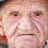

In [ ]:
#!pip install mtcnn
!pip install mtcnn
import mtcnn
from mtcnn.mtcnn import MTCNN
import PIL
from PIL import Image

img = np.asarray(imm, dtype='uint8')
detector = MTCNN()
# detekcija face(pozicija ociju,usta...)
detections = detector.detect_faces(img)
print(detections)
x1, y1, width, height = detections[0]['box']
dw = round(width * 0)
dh = round(height * 0)
x2, y2 = x1 + width + dw, y1 + height + dh
face = img[y1:y2, x1:x2]

# resize
face = PIL.Image.fromarray(face)
face = face.resize((48, 48))
face = np.asarray(face)
cv2_imshow(face)

In [ ]:
#testiranje na vlastitim slikama

from google.colab.patches import cv2_imshow
import cv2
def test_image(imma):

  #pretvorba nazad u rgb format
  #img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/male.jpg')
  image = cv2.cvtColor(imma, cv2.COLOR_BGR2RGB)
  
  cv2_imshow(image)
  image_test=image/255

  #podaci iz slike i modela
  pred_1=Model.predict(np.array([image_test]))
  #print(pred_1)
  gender_f=['Male','Female']
  age=int(np.round(pred_1[1][0]))
  gender=int(np.round(pred_1[0][0]))

  print("Predicted Age: "+ str(age))
  print("Predicted Gender: "+ gender_f[gender])



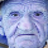

Predicted Age: 56
Predicted Gender: Male


In [ ]:
test_image(face)

In [ ]:
#testiranje na slikama iz testnog uzorka
rom google.colab.patches import cv2_imshow
import cv2
def test_image(ind,images_f,images_f_2,Model):

  #pretvorba nazad u rgb format
  image = cv2.cvtColor(images_f[ind], cv2.COLOR_BGR2RGB)
  cv2_imshow(image)
  image_test=images_f_2[ind]

  #podaci iz slike i modela
  pred_1=Model.predict(np.array([image_test]))
  #print(pred_1)
  gender_f=['Male','Female']
  age=int(np.round(pred_1[1][0]))
  gender=int(np.round(pred_1[0][0]))

  print()
  print("Predicted Age: "+ str(age))
  print("Real Age: "+ str(ages_f[ind]))
  print("Predicted Gender: "+ gender_f[gender])
  print("Real Gender: "+ gender_f[genders_f[ind]])



SyntaxError: ignored

In [ ]:

test_image(700,images_f,images_f_2,Model)

In [ ]:
test_image(137,images_f,images_f_2,Model)

In [ ]:
test_image(502,images_f,images_f_2,Model)

In [ ]:
test_image(24,images_f,images_f_2,Model)